<a href="https://colab.research.google.com/github/Wlegates/AI/blob/main/HW3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#AI homework assignment 3 Greedy first search vs A* search
#William LeGates
#10/21/2025
#All code was modified and tested in Pycharm IDE

In [ ]:
## Part 1 comparing A* search with Greedy best first search
#######################################################
#### MazeGame uses a grid of rows X cols to demonstrate
#### pathfinding using A*.
####
#######################################################
import tkinter as tk
from PIL import Image, Image, ImageOps
from queue import PriorityQueue

###############################################################
## Class: Cell
## Represents a single cell in the maze.
## Each cell tracks:
## - its (x, y) position,
## - whether it’s a wall,
## - pathfinding values: g (path cost), h (heuristic), and f = g + h.
###############################################################

class Cell:
    #### Initially, arre maze cells have g() = inf and h() = 0
    def __init__(self, x, y, is_wall=False):
      # Cell coordinates
        self.x = x
        self.y = y
        self.is_wall = is_wall

        #Initialized A* parameters
        self.g = float("inf") #Cost from start til current cell
        self.h = 0 # Estimated cost to goal
        self.f = float("inf") # Total estimated cost
        self.parent = None # Parent pointer

    #### Compare two cells based on their evaluation functions
    def __lt__(self, other):
        return self.f < other.f

###############################################################
## Class: MazeGame
## Handles both:
##  - Pathfinding logic (A* and Greedy Best-First Search)
##  - Graphical interface using tkinter.
###############################################################
class MazeGame:
    def __init__(self, root, maze, algorithm = "A*"):

        self.root = root
        self.maze = maze
        self.algorithm = algorithm # "A*" or "GreedyBestFirst"

        #Maze dimensions
        self.rows = len(maze)
        self.cols = len(maze[0])

        #### Start state: (0,0) or top left
        self.agent_pos = (0, 0)

        #### Goal state:  (rows-1, cols-1) or bottom right
        self.goal_pos = (self.rows - 1, self.cols - 1)

        self.cells = [[Cell(x, y, maze[x][y] == 1) for y in range(self.cols)] for x in range(self.rows)]

        #### Start state's initial values for f(n) = g(n) + h(n)
        self.cells[self.agent_pos[0]][self.agent_pos[1]].g = 0
        self.cells[self.agent_pos[0]][self.agent_pos[1]].h = self.heuristic(self.agent_pos)
        self.cells[self.agent_pos[0]][self.agent_pos[1]].f = self.heuristic(self.agent_pos)

        #### The maze cell size in pixels
        self.cell_size = 75
        self.canvas = tk.Canvas(root, width=self.cols * self.cell_size, height=self.rows * self.cell_size, bg='white')
        self.canvas.pack()

        self.draw_maze()

        #### Display the optimum path in the maze
        self.find_path()



    ############################################################
    #### This is for the GUI part. No need to modify this unless
    #### GUI changes are needed.
    ############################################################
    def draw_maze(self):
        for x in range(self.rows):
            for y in range(self.cols):
                color = 'maroon' if self.maze[x][y] == 1 else 'white'
                self.canvas.create_rectangle(y * self.cell_size, x * self.cell_size, (y + 1) * self.cell_size, (x + 1) * self.cell_size, fill=color)
                if not self.cells[x][y].is_wall:
                    text = f'g={self.cells[x][y].g}\nh={self.cells[x][y].h}'
                    self.canvas.create_text((y + 0.5) * self.cell_size, (x + 0.5) * self.cell_size, font=("Purisa", 12), text=text)



    ############################################################
    #### Manhattan distance (The Heuristic)
    ############################################################
    def heuristic(self, pos):
        return (abs(pos[0] - self.goal_pos[0]) + abs(pos[1] - self.goal_pos[1]))



    ############################################################
    #### The find path function
    #### Uses both A* and Greedy Best First search
    ############################################################
    def find_path(self):
        open_set = PriorityQueue()

        #### Add the start state to the queue
        open_set.put((0, self.agent_pos))

        #### Continue exploring until the queue is exhausted
        while not open_set.empty():
            current_cost, current_pos = open_set.get()
            current_cell = self.cells[current_pos[0]][current_pos[1]]

            #### Stop if goal is reached
            if current_pos == self.goal_pos:
                self.reconstruct_path()
                break


            #### Agent goes E, W, N, and S, whenever possible
            for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
                new_pos = (current_pos[0] + dx, current_pos[1] + dy)

                if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.cells[new_pos[0]][new_pos[1]].is_wall:

                    #### The cost of moving to a new position is 1 unit
                    new_g = current_cell.g + 1


                    if new_g < self.cells[new_pos[0]][new_pos[1]].g:
                        ### Update the path cost g()
                        self.cells[new_pos[0]][new_pos[1]].g = new_g

                        ### Update the heurstic h()
                        self.cells[new_pos[0]][new_pos[1]].h = self.heuristic(new_pos)

                        ### Update the evaluation function for the cell n: f(n) = g(n) + h(n)
                        if self.algorithm == "A*":
                            self.cells[new_pos[0]][new_pos[1]].f = new_g + self.cells[new_pos[0]][new_pos[1]].h
                        ### This condition uses the Greedy best first search algorithm instead of the A* algorithm
                        elif self.algorithm == "GreedyBestFirst":
                            self.cells[new_pos[0]][new_pos[1]].f = self.cells[new_pos[0]][new_pos[1]].h


                        self.cells[new_pos[0]][new_pos[1]].parent = current_cell
                        #### Add the new cell to the priority queue
                        open_set.put((self.cells[new_pos[0]][new_pos[1]].f, new_pos))


    ############################################################
    #### This is for the GUI part. No need to modify this unless
    #### screen changes are needed.
    ############################################################
    def reconstruct_path(self):
        current_cell = self.cells[self.goal_pos[0]][self.goal_pos[1]]
        while current_cell.parent:
            x, y = current_cell.x, current_cell.y
            self.canvas.create_rectangle(y * self.cell_size, x * self.cell_size, (y + 1) * self.cell_size, (x + 1) * self.cell_size, fill='green')
            current_cell = current_cell.parent

            # Redraw cell with updated g() and h() values
            self.canvas.create_rectangle(y * self.cell_size, x * self.cell_size, (y + 1) * self.cell_size, (x + 1) * self.cell_size, fill='skyblue')
            text = f'g={self.cells[x][y].g}\nh={self.cells[x][y].h}'
            self.canvas.create_text((y + 0.5) * self.cell_size, (x + 0.5) * self.cell_size, font=("Purisa", 12), text=text)


    ############################################################
    #### This is for the GUI part. No need to modify this unless
    #### screen changes are needed.
    ############################################################
    def move_agent(self, event):

        #### Move right, if possible
        if event.keysym == 'Right' and self.agent_pos[1] + 1 < self.cols and not self.cells[self.agent_pos[0]][self.agent_pos[1] + 1].is_wall:
            self.agent_pos = (self.agent_pos[0], self.agent_pos[1] + 1)


        #### Move Left, if possible
        elif event.keysym == 'Left' and self.agent_pos[1] - 1 >= 0 and not self.cells[self.agent_pos[0]][self.agent_pos[1] - 1].is_wall:
            self.agent_pos = (self.agent_pos[0], self.agent_pos[1] - 1)

        #### Move Down, if possible
        elif event.keysym == 'Down' and self.agent_pos[0] + 1 < self.rows and not self.cells[self.agent_pos[0] + 1][self.agent_pos[1]].is_wall:
            self.agent_pos = (self.agent_pos[0] + 1, self.agent_pos[1])

        #### Move Up, if possible
        elif event.keysym == 'Up' and self.agent_pos[0] - 1 >= 0 and not self.cells[self.agent_pos[0] - 1][self.agent_pos[1]].is_wall:
            self.agent_pos = (self.agent_pos[0] - 1, self.agent_pos[1])

        #### Erase agent from the previous cell at time t
        self.canvas.delete("agent")


        ### Redraw the agent in color navy in the new cell position at time t+1
        self.canvas.create_rectangle(self.agent_pos[1] * self.cell_size, self.agent_pos[0] * self.cell_size,
                                    (self.agent_pos[1] + 1) * self.cell_size, (self.agent_pos[0] + 1) * self.cell_size,
                                    fill='navy', tags="agent")



############################################################
#### Modify the wall cells to experiment with different maze
#### configurations.
############################################################
maze = [
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
]



############################################################
#### The mainloop activates the GUI.
#### Using root 1 to show the A* search and root 2 to show
#### Greedy best first search.
############################################################

## This prints the window that shows the Maze being solved using A* algorithm
root1 = tk.Tk()
root1.title("A* Maze")
game1 = MazeGame(root1, maze, algorithm = "A*")
root1.bind("<KeyPress>", game1.move_agent)

## This prints the window that shows the same maze being solved with greedy best first search
root2 = tk.Tk()
root2.title("GreedyBestFirst")
game2 = MazeGame(root2, maze, algorithm = "GreedyBestFirst")
root2.bind("<KeyPress>", game2.move_agent)

##Prints both windows at the same time
root1.mainloop()
root2.mainloop()

TclError: no display name and no $DISPLAY environment variable

In [ ]:
# Code added
Added and algorithm parameter to the MazeGame constructor. In find_path() I added :
if self.algorithm == "A*":
    self.cells[new_pos[0]][new_pos[1]].f = new_g + self.cells[new_pos[0]][new_pos[1]].h
elif self.algorithm == "GreedyBestFirst":
    self.cells[new_pos[0]][new_pos[1]].f = self.cells[new_pos[0]][new_pos[1]].h



#Experiment setup

*   The maze was 10 x 10 units with walls
*   Both algorithms used the same heuristic and start and goal states

Greed best first on left A* on right

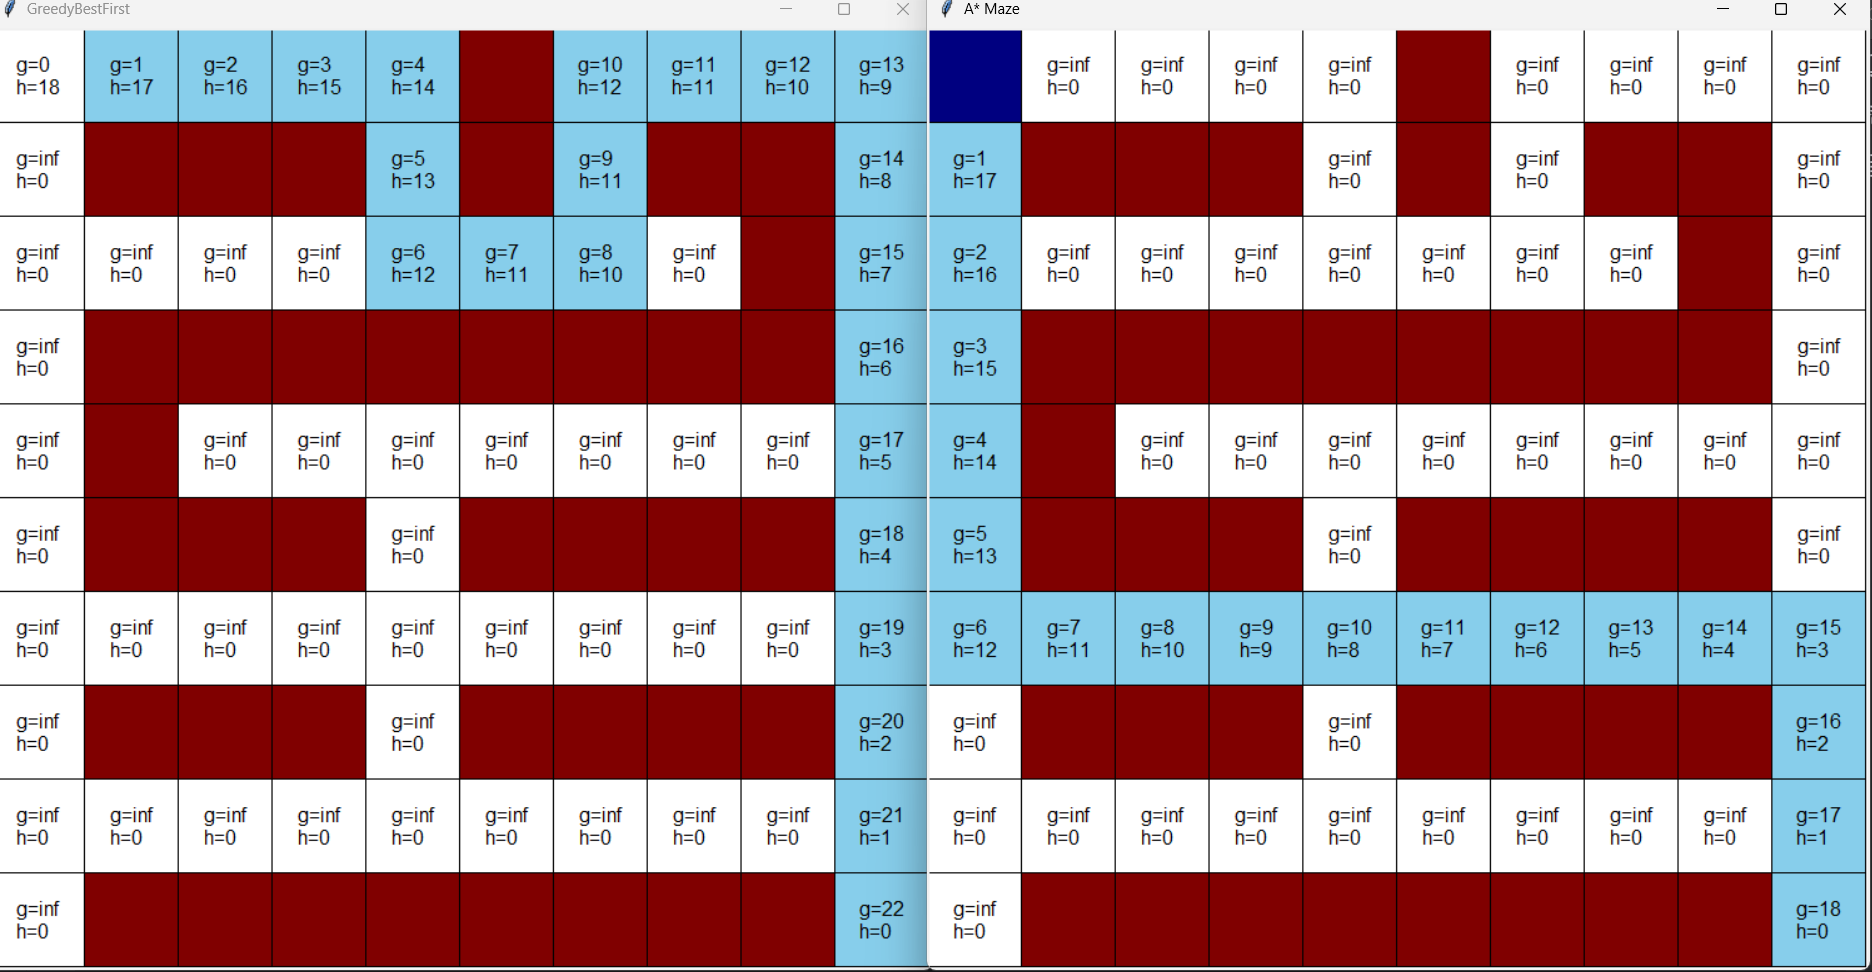

#Observations

Greedy Best-First Search prioritizes nodes with the smallest heuristic value (h), meaning it expands toward the goal quickly but may overlook cheaper alternative routes, often producing a non-optimal path.

A* considers both the path cost (g) and heuristic (h) using the function f(n) = g(n) + h(n). This makes it more thorough and guarantees the optimal path at the cost of expanding more nodes.

#Conclusion

A* achieved the shortest path with more node expansions, while Greedy Best-First reached the goal faster but less efficiently.

In [ ]:
##Part 2 Using eucleadean distance instead of manhattan distance
#######################################################
#### MazeGame uses a grid of rows X cols to demonstrate
#### pathfinding using A*.
####
#### AI, Fall 2025
#######################################################
import tkinter as tk
import random
from PIL import Image, Image, ImageOps
from queue import PriorityQueue


######################################################
#### A cell stores f(), g() and h() values
#### A cell is either open or part of a wall
######################################################

class Cell:
    #### Initially, arre maze cells have g() = inf and h() = 0
    def __init__(self, x, y, is_wall=False):
        self.x = x
        self.y = y
        self.is_wall = is_wall
        self.g = float("inf")
        self.h = 0
        self.f = float("inf")
        self.parent = None #Reconstructs final path

    #### Compare two cells based on their evaluation functions
    def __lt__(self, other):
        return self.f < other.f


######################################################
# A maze is a grid of size rows X cols
######################################################
class MazeGame:
    def __init__(self, root, maze, algorithm = "A*"):
        self.root = root
        self.maze = maze
        self.algorithm = algorithm

        self.rows = len(maze)
        self.cols = len(maze[0])

        #### Start state: (0,0) or top left
        self.agent_pos = (0, 0)

        #### Goal state:  (rows-1, cols-1) or bottom right
        self.goal_pos = (self.rows - 1, self.cols - 1)

        self.cells = [[Cell(x, y, maze[x][y] == 1) for y in range(self.cols)] for x in range(self.rows)]

        #### Start state's initial values for f(n) = g(n) + h(n)
        self.cells[self.agent_pos[0]][self.agent_pos[1]].g = 0
        self.cells[self.agent_pos[0]][self.agent_pos[1]].h = self.heuristic(self.agent_pos)
        self.cells[self.agent_pos[0]][self.agent_pos[1]].f = self.heuristic(self.agent_pos)

        #### The maze cell size in pixels
        self.cell_size = 75
        self.canvas = tk.Canvas(root, width=self.cols * self.cell_size, height=self.rows * self.cell_size, bg='white')
        self.canvas.pack()

        self.draw_maze()

        #### Display the optimum path in the maze
        self.find_path()



    ############################################################
    #### This is for the GUI part. No need to modify this unless
    #### GUI changes are needed.
    ############################################################
    def draw_maze(self):
        for x in range(self.rows):
            for y in range(self.cols):
                color = 'maroon' if self.maze[x][y] == 1 else 'white'
                self.canvas.create_rectangle(y * self.cell_size, x * self.cell_size, (y + 1) * self.cell_size, (x + 1) * self.cell_size, fill=color)
                if not self.cells[x][y].is_wall:
                    text = f'g={self.cells[x][y].g}\nh={self.cells[x][y].h}'
                    self.canvas.create_text((y + 0.5) * self.cell_size, (x + 0.5) * self.cell_size, font=("Purisa", 12), text=text)



    ############################################################
    #### Eucledean distance
    ############################################################
    def heuristic(self, pos):
        dx = self.goal_pos[0] - pos[0]
        dy = self.goal_pos[1] - pos[1]
        return (dx ** 2 + dy ** 2) ** 0.5


    ############################################################
    #### A* Algorithm and Greedy best first Algorithm
    ############################################################
    def find_path(self):
        open_set = PriorityQueue()

        #### Add the start state to the queue
        open_set.put((0, self.agent_pos))

        #### Continue exploring until the queue is exhausted
        while not open_set.empty():
            current_cost, current_pos = open_set.get()
            current_cell = self.cells[current_pos[0]][current_pos[1]]

            #### Stop if goal is reached
            if current_pos == self.goal_pos:
                self.reconstruct_path()
                break

            ### Agent can move N, S, E, W, NE, NW, SE, SW
            moves = [(0, 1), (1, 0), (0, -1), (-1, 0),
                     (1,1),(-1,1),(1,-1),(-1,-1)]

            ## Randomizes the moves
            random.shuffle(moves)

            for dx, dy in moves:
                new_pos = (current_pos[0] + dx, current_pos[1] + dy)

                if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.cells[new_pos[0]][
                    new_pos[1]].is_wall:

                    #### Cost = 1 for straight, √2 for diagonal
                    step_cost = (2 ** 0.5) if (dx != 0 and dy != 0) else 1
                    new_g = current_cell.g + step_cost

                    #checks bounds and avoids walls
                    if new_g < self.cells[new_pos[0]][new_pos[1]].g:
                        self.cells[new_pos[0]][new_pos[1]].g = new_g
                        self.cells[new_pos[0]][new_pos[1]].h = self.heuristic(new_pos)

                        #Uses the A* algorithm
                        if self.algorithm == "A*":
                            self.cells[new_pos[0]][new_pos[1]].f = new_g + self.cells[new_pos[0]][new_pos[1]].h
                        #Uses the Greedy best first Algorithm
                        elif self.algorithm == "GreedyBestFirst":
                            self.cells[new_pos[0]][new_pos[1]].f = self.cells[new_pos[0]][new_pos[1]].h

                        self.cells[new_pos[0]][new_pos[1]].parent = current_cell
                        open_set.put((self.cells[new_pos[0]][new_pos[1]].f, new_pos))


    ############################################################
    #### This is for the GUI part. No need to modify this unless
    #### screen changes are needed.
    ############################################################
    def reconstruct_path(self):
        current_cell = self.cells[self.goal_pos[0]][self.goal_pos[1]]
        while current_cell.parent:
            x, y = current_cell.x, current_cell.y
            self.canvas.create_rectangle(y * self.cell_size, x * self.cell_size, (y + 1) * self.cell_size, (x + 1) * self.cell_size, fill='green')
            current_cell = current_cell.parent

            # Redraw cell with updated g() and h() values
            self.canvas.create_rectangle(y * self.cell_size, x * self.cell_size, (y + 1) * self.cell_size, (x + 1) * self.cell_size, fill='skyblue')
            text = f'g={self.cells[x][y].g}\nh={self.cells[x][y].h}'
            self.canvas.create_text((y + 0.5) * self.cell_size, (x + 0.5) * self.cell_size, font=("Purisa", 12), text=text)


    ############################################################
    #### This is for the GUI part. No need to modify this unless
    #### screen changes are needed.
    ############################################################
    def move_agent(self, event):

        #### Move right, if possible
        if event.keysym == 'Right' and self.agent_pos[1] + 1 < self.cols and not self.cells[self.agent_pos[0]][self.agent_pos[1] + 1].is_wall:
            self.agent_pos = (self.agent_pos[0], self.agent_pos[1] + 1)


        #### Move Left, if possible
        elif event.keysym == 'Left' and self.agent_pos[1] - 1 >= 0 and not self.cells[self.agent_pos[0]][self.agent_pos[1] - 1].is_wall:
            self.agent_pos = (self.agent_pos[0], self.agent_pos[1] - 1)

        #### Move Down, if possible
        elif event.keysym == 'Down' and self.agent_pos[0] + 1 < self.rows and not self.cells[self.agent_pos[0] + 1][self.agent_pos[1]].is_wall:
            self.agent_pos = (self.agent_pos[0] + 1, self.agent_pos[1])

        #### Move Up, if possible
        elif event.keysym == 'Up' and self.agent_pos[0] - 1 >= 0 and not self.cells[self.agent_pos[0] - 1][self.agent_pos[1]].is_wall:
            self.agent_pos = (self.agent_pos[0] - 1, self.agent_pos[1])

        #### Erase agent from the previous cell at time t
        self.canvas.delete("agent")


        ### Redraw the agent in color navy in the new cell position at time t+1
        self.canvas.create_rectangle(self.agent_pos[1] * self.cell_size, self.agent_pos[0] * self.cell_size,
                                    (self.agent_pos[1] + 1) * self.cell_size, (self.agent_pos[0] + 1) * self.cell_size,
                                    fill='navy', tags="agent")



############################################################
#### Modify the wall cells to experiment with different maze
#### configurations.
############################################################
maze = [
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
]



############################################################
#### The mainloop activates the GUI.
############################################################

## This prints the window that shows the Maze being solved using A* algorithm
root1 = tk.Tk()
root1.title("A* Maze")
game1 = MazeGame(root1, maze, algorithm = "A*")
root1.bind("<KeyPress>", game1.move_agent)

## This prints the window that shows the same maze being solved with greedy best first search
root2 = tk.Tk()
root2.title("GreedyBestFirst")
game2 = MazeGame(root2, maze, algorithm = "GreedyBestFirst")
root2.bind("<KeyPress>", game2.move_agent)

## Prints both windows at the same time
root1.mainloop()
root2.mainloop()


In [ ]:
#Code changes
#The manhattan algorithm was replaces with Euclidean distance
def heuristic(self, pos):
    dx = self.goal_pos[0] - pos[0]
    dy = self.goal_pos[1] - pos[1]
    return (dx ** 2 + dy ** 2) ** 0.5  # Euclidean distance
#In find_path(), diagonal and random moves were added
moves = [(0, 1), (1, 0), (0, -1), (-1, 0),
         (1,1),(-1,1),(1,-1),(-1,-1)]
random.shuffle(moves)

#Experiment setup

*   Maze size: 10 × 10 grid with the same walls as Part 1
*   Both algorithms (A* and Greedy Best-First) used Euclidean distance
*   Diagonal movements were allowed
*   Moves executed in random order each run









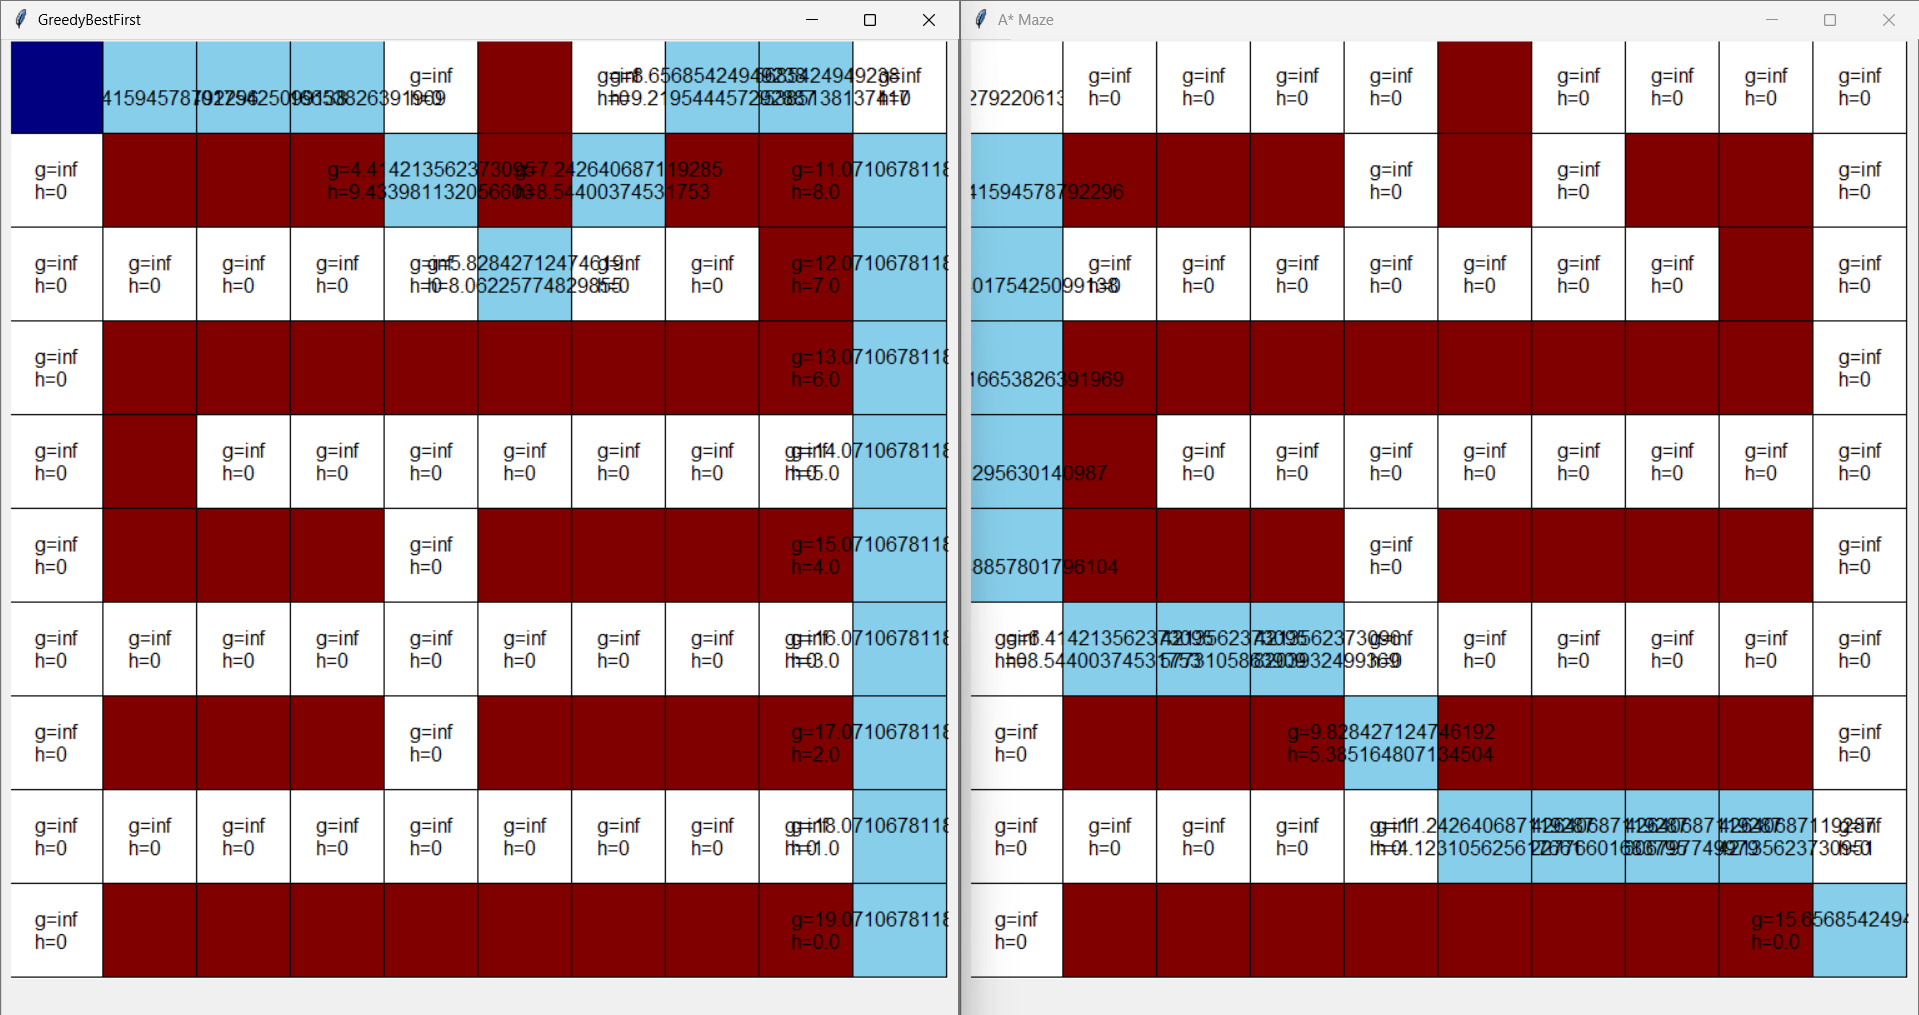

#Observations

Using Euclidean distance and allowing diagonal movement made the paths more direct and realistic. The A* algorithm continued to find the most optimal route by balancing path cost and heuristic values, while Greedy Best-First Search moved more quickly toward the goal but often took less efficient routes.

#Conclusion

Using Euclidean distance with diagonal movement produced smoother and shorter paths. A* remained optimal, achieving the lowest total cost, whereas Greedy Best-First was faster but less reliable.

In [ ]:
#Part 3 adding the weights of alpha and beta
#######################################################
#### MazeGame uses a grid of rows X cols to demonstrate
#### pathfinding using A*.
####
#### AI, Spring 2024
#######################################################
import tkinter as tk
import random
from PIL import Image, Image, ImageOps
from queue import PriorityQueue

######################################################
#### A cell stores f(), g() and h() values
#### A cell is either open or part of a wall
######################################################

class Cell:
    #### Initially, arre maze cells have g() = inf and h() = 0
    def __init__(self, x, y, is_wall=False):
        self.x = x
        self.y = y
        self.is_wall = is_wall
        self.g = float("inf")
        self.h = 0
        self.f = float("inf")
        self.parent = None #Reconstructs path

    #### Compare two cells based on their evaluation functions
    def __lt__(self, other):
        return self.f < other.f


######################################################
# A maze is a grid of size rows X cols
######################################################
class MazeGame:
    def __init__(self, root, maze, algorithm = "A*", alpha = 1.0, beta = 1.0):
        self.root = root
        self.maze = maze
        self.algorithm = algorithm

        #added weighting factors to algorithm
        self.alpha = alpha
        self.beta = beta

        self.rows = len(maze)
        self.cols = len(maze[0])

        #### Start state: (0,0) or top left
        self.agent_pos = (0, 0)

        #### Goal state:  (rows-1, cols-1) or bottom right
        self.goal_pos = (self.rows - 1, self.cols - 1)

        self.cells = [[Cell(x, y, maze[x][y] == 1) for y in range(self.cols)] for x in range(self.rows)]

        #### Start state's initial values for f(n) = g(n) + h(n)
        self.cells[self.agent_pos[0]][self.agent_pos[1]].g = 0
        self.cells[self.agent_pos[0]][self.agent_pos[1]].h = self.heuristic(self.agent_pos)
        self.cells[self.agent_pos[0]][self.agent_pos[1]].f = self.heuristic(self.agent_pos)

        #### The maze cell size in pixels
        self.cell_size = 75
        self.canvas = tk.Canvas(root, width=self.cols * self.cell_size, height=self.rows * self.cell_size, bg='white')
        self.canvas.pack()

        self.draw_maze()

        #### Display the optimum path in the maze
        self.find_path()



    ############################################################
    #### This is for the GUI part. No need to modify this unless
    #### GUI changes are needed.
    ############################################################
    def draw_maze(self):
        for x in range(self.rows):
            for y in range(self.cols):
                color = 'maroon' if self.maze[x][y] == 1 else 'white'
                self.canvas.create_rectangle(y * self.cell_size, x * self.cell_size, (y + 1) * self.cell_size, (x + 1) * self.cell_size, fill=color)
                if not self.cells[x][y].is_wall:
                    text = f'g={self.cells[x][y].g}\nh={self.cells[x][y].h}'
                    self.canvas.create_text((y + 0.5) * self.cell_size, (x + 0.5) * self.cell_size, font=("Purisa", 12), text=text)



    ############################################################
    #### Euclidean distance
    ############################################################
    def heuristic(self, pos):
        dx = self.goal_pos[0] - pos[0]
        dy = self.goal_pos[1] - pos[1]
        return (dx ** 2 + dy ** 2) ** 0.5

        ##return (abs(pos[0] - self.goal_pos[0]) + abs(pos[1] - self.goal_pos[1]))



    ############################################################
    #### A* Algorithm and Greedy best first search
    ### now including alpha and beta values
    ############################################################
    def find_path(self):
        open_set = PriorityQueue()

        #### Add the start state to the queue
        open_set.put((0, self.agent_pos))

        self.node_expansions = 0

        #### Continue exploring until the queue is exhausted
        while not open_set.empty():
            current_cost, current_pos = open_set.get()
            self.node_expansions += 1

            current_cell = self.cells[current_pos[0]][current_pos[1]]

            #### Stop if goal is reached
            if current_pos == self.goal_pos:
                self.reconstruct_path()
                #report stats in the console
                print(
                    f"Algorithm={self.algorithm}, alpha={self.alpha}, beta={self.beta}, "
                    f"expanded={self.node_expansions}, "
                    f"g(goal)={self.cells[self.goal_pos[0]][self.goal_pos[1]].g:.3f}"
                )
                break

            # Possible moves in 8 directions
            moves = [(0, 1), (1, 0), (0, -1), (-1, 0),
                     (1,1),(-1,1),(1,-1),(-1,-1)]

            #random moves from part 2
            random.shuffle(moves)

            for dx, dy in moves:
                new_pos = (current_pos[0] + dx, current_pos[1] + dy)

                if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.cells[new_pos[0]][new_pos[1]].is_wall:

                    neighbor = self.cells[new_pos[0]][new_pos[1]]

                    #### Cost = 1 for straight, √2 for diagonal
                    step_cost = (2 ** 0.5) if (dx != 0 and dy != 0) else 1
                    new_g = current_cell.g + step_cost

                    if new_g < neighbor.g:
                        neighbor.g = new_g
                        neighbor.h = self.heuristic(new_pos)

                        #after neighbor.h is set
                        #weighted A* algorithm
                        if self.algorithm == "A*":
                            #weighted A*: use alpha and beta
                            neighbor.f = self.alpha * neighbor.g + self.beta * neighbor.h
                        elif self.algorithm == "GreedyBestFirst":
                            neighbor.f = neighbor.h

                        #Set parent and add to queue
                        neighbor.parent = current_cell
                        open_set.put((neighbor.f, new_pos))


    ############################################################
    #### This is for the GUI part. No need to modify this unless
    #### screen changes are needed.
    ############################################################
    def reconstruct_path(self):
        current_cell = self.cells[self.goal_pos[0]][self.goal_pos[1]]
        while current_cell.parent:
            x, y = current_cell.x, current_cell.y
            self.canvas.create_rectangle(y * self.cell_size, x * self.cell_size, (y + 1) * self.cell_size, (x + 1) * self.cell_size, fill='green')
            current_cell = current_cell.parent

            # Redraw cell with updated g() and h() values
            self.canvas.create_rectangle(y * self.cell_size, x * self.cell_size, (y + 1) * self.cell_size, (x + 1) * self.cell_size, fill='skyblue')
            text = f'g={self.cells[x][y].g}\nh={self.cells[x][y].h}'
            self.canvas.create_text((y + 0.5) * self.cell_size, (x + 0.5) * self.cell_size, font=("Purisa", 12), text=text)


    ############################################################
    #### This is for the GUI part. No need to modify this unless
    #### screen changes are needed.
    ############################################################
    def move_agent(self, event):

        #### Move right, if possible
        if event.keysym == 'Right' and self.agent_pos[1] + 1 < self.cols and not self.cells[self.agent_pos[0]][self.agent_pos[1] + 1].is_wall:
            self.agent_pos = (self.agent_pos[0], self.agent_pos[1] + 1)


        #### Move Left, if possible
        elif event.keysym == 'Left' and self.agent_pos[1] - 1 >= 0 and not self.cells[self.agent_pos[0]][self.agent_pos[1] - 1].is_wall:
            self.agent_pos = (self.agent_pos[0], self.agent_pos[1] - 1)

        #### Move Down, if possible
        elif event.keysym == 'Down' and self.agent_pos[0] + 1 < self.rows and not self.cells[self.agent_pos[0] + 1][self.agent_pos[1]].is_wall:
            self.agent_pos = (self.agent_pos[0] + 1, self.agent_pos[1])

        #### Move Up, if possible
        elif event.keysym == 'Up' and self.agent_pos[0] - 1 >= 0 and not self.cells[self.agent_pos[0] - 1][self.agent_pos[1]].is_wall:
            self.agent_pos = (self.agent_pos[0] - 1, self.agent_pos[1])

        #### Erase agent from the previous cell at time t
        self.canvas.delete("agent")


        ### Redraw the agent in color navy in the new cell position at time t+1
        self.canvas.create_rectangle(self.agent_pos[1] * self.cell_size, self.agent_pos[0] * self.cell_size,
                                    (self.agent_pos[1] + 1) * self.cell_size, (self.agent_pos[0] + 1) * self.cell_size,
                                    fill='navy', tags="agent")



############################################################
#### Modify the wall cells to experiment with different maze
#### configurations.
############################################################
maze = [
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
]



############################################################
#### The mainloop activates the GUI.
############################################################

## This prints the window that shows the Maze being solved using A* algorithm
## With alpha = 1.0 and Beta = 1.0
root1 = tk.Tk()
root1.title("A* Maze (alpha = 1.0, beta = 1.0)")
game1 = MazeGame(root1, maze, algorithm = "A*", alpha= 1.0, beta=1.0)
root1.bind("<KeyPress>", game1.move_agent)

## A* with alpha = 1.0 and Beta = 2.0
root2 = tk.Tk()
root2.title("A* Maze alpha = 1.0, beta = 2.0")
game2 = MazeGame(root2, maze, algorithm = "A*", alpha= 1.0, beta=2.0)
root2.bind("<KeyPress>", game2.move_agent)

## a* with alpha = 1.0 and Beta = 5.0
root3 = tk.Tk()
root3.title("A* Maze alpha = 1.0, beta = 5.0")
game3 = MazeGame(root3, maze, algorithm = "A*", alpha= 1.0, beta= 5.0)

# Shows three windows for the different comparisons
root1.mainloop()
root2.mainloop()
root3.mainloop()


TclError: no display name and no $DISPLAY environment variable

In [ ]:
#Code changes
# Weighted A* evaluation
neighbor.f = self.alpha * neighbor.g + self.beta * neighbor.h

#Different values of α and β were passed to the MazeGame constructor for example:
game1 = MazeGame(root, maze, algorithm="A*", alpha=1.0, beta=1.0)
game2 = MazeGame(root, maze, algorithm="A*", alpha=1.0, beta=2.0)

#Expirement setup



*   Used a 10 x 10 maze however its slightly modified from parts 1 and 2 to spot the differences between the three values
*   Euclidean distance was still used here
*   Diagonal and random movements were allowed
*   Ran experiments with β = 1.0, 2.0, and 5.0 (keeping α = 1.0)

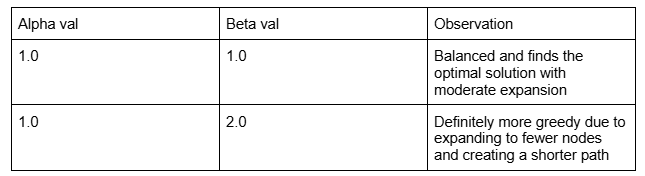

Alpha = 1.0 Beta = 1.0

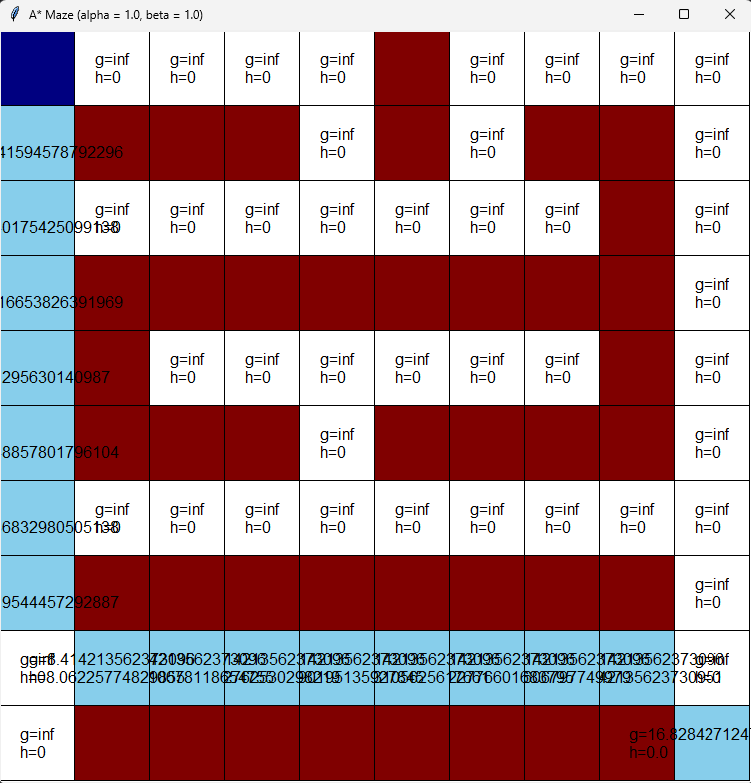

Alpha = 1.0 Beta = 2.0

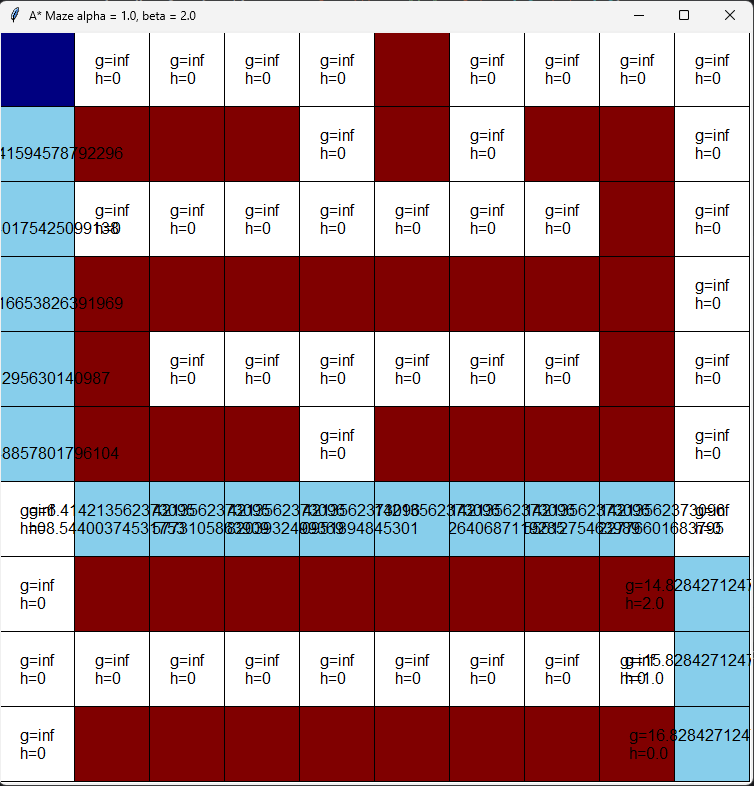

Alpha = 1.0 Beta = 5.0

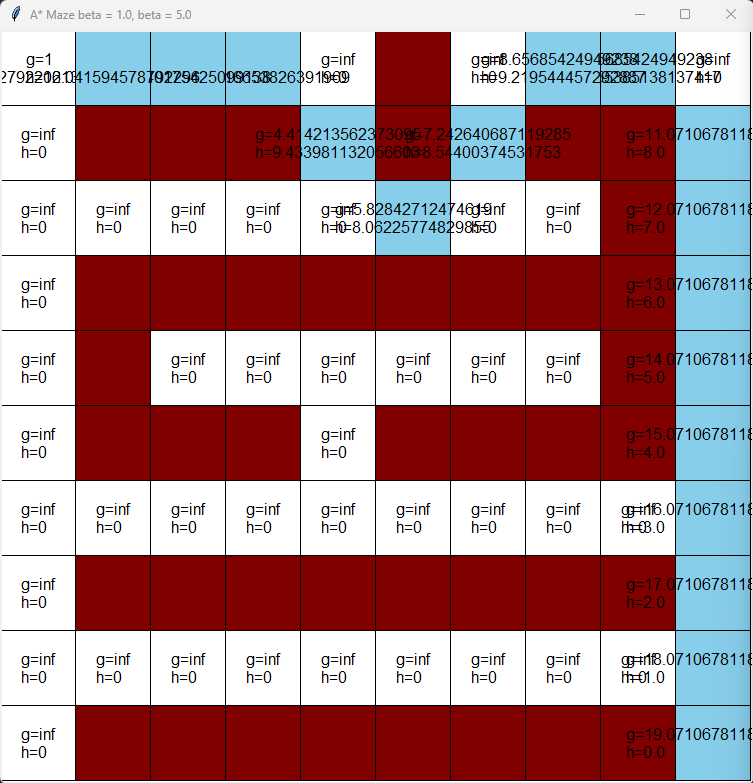

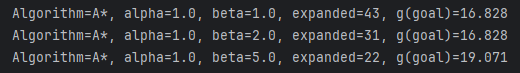

I had the console print out the number of nodes expanded too. The screenshot above shows the higher the value of beta the less nodes expanded to showing that the algorithm gets more greedy as beta increases.

#Observations

As β increased, the algorithm became more greedy—expanding fewer nodes and focusing heavily on cells closer to the goal.
When β = 1.0, A* maintained an optimal balance between g(n) and h(n), producing the most efficient path.
At β = 2.0 and β = 3.0, the search favored heuristic values more, reducing computation but sometimes missing the absolute shortest path.

#Conclusion
Adjusting α and β changes how A* weighs actual versus estimated cost.
Higher β values make A* behave more like Greedy Best-First Search—faster but less optimal—while lower β values preserve full optimality at the cost of exploring more nodes.